In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import cross_val_score

In [2]:
from importlib import reload

from wombats import utils
from wombats import metrics
from wombats import models
from wombats import perturbation
import random
# if changes to the files run this to reload the moduls
utils = reload(utils)
metrics = reload(metrics)
models = reload(models)

In [3]:
data_file = Path('../data/steinmetz/steinmetz_all.npy')
data_folder = Path('../data/steinmetz/')
if not data_file.exists():
    data = utils.load_steinmentz()
    data_folder.mkdir(parents=True)
    data_file.touch()
    np.save(data_file, data)
else:
    data = np.load(data_file, allow_pickle=True)

In [4]:
utils = reload(utils)
region1 = 'visual'
region2 = 'motor'
dataset = utils.DataSet(data, region1=region1, region2=region2)

In [41]:
dataset.valid_sessions_idx

array([ 0,  3,  4,  7, 12, 13, 21, 24, 25, 26, 34, 35, 36, 38])

In [61]:
utils = reload(utils)
region1 = 'visual'
region2 = 'motor'
dataset = utils.DataSet(data[:4], region1=region1, region2=region2)

In [45]:
dataset

array([ True,  True,  True, False,  True, False, False, False, False,
        True,  True, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True, False,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True, False,  True,  True, False, False,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True, False, False,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True, False,  True, False,
        True, False, False, False, False, False,  True, False,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,

In [13]:
session_data = data[0]
delta_contrast = session_data['contrast_right'] - session_data['contrast_left']
response = -session_data['response']

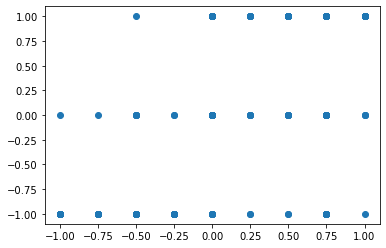

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(delta_contrast, response)

In [38]:
np.isin(session_data['brain_area'], ['ACA', 'MOs'])

array([ True,  True,  True, False,  True,  True, False,  True,  True,
       False, False, False,  True, False, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True, False, False,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True, False, False, False,  True,  True,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
       False,  True, False,  True,  True,  True, False,  True, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
        True,  True,

In [40]:
np.in1d(np.array(['ACA', 'MOs', 'ACA', 'dsdfsd']), np.array(['ACA', 'MOs']))
#session_data['brain_area'].astype('str')[0] in ['ACA', 'MOs']

array([ True,  True,  True, False])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,